<a href="https://colab.research.google.com/github/najwaikhza/KomputasiIntelegensiaTask/blob/main/EndTermTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Najwa Ikhza Athifah <br>
NPM : 2106703531 <br>
Rice Classification using CNN

### Import Library dan Dataset

In [2]:
# import requirement libraries and tools
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from google.colab import files
uploaded = files.upload()  # Pilih file ZIP yang ingin di-upload


Saving Rice_Image_Dataset.zip to Rice_Image_Dataset.zip


In [7]:
!unzip Rice_Image_Dataset.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: /content/Rice_Image_Dataset/Karacadag/Karacadag (55

In [8]:
# Set the path to the dataset
dataset_path = 'Rice_Image_Dataset'

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):

    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

  # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
       # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        # Store the label for the image in the labels list
        labels.append(subfolder)

 # Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

### Visualisasi data

In [9]:
df.head()

,image,label
0,Rice_Image_Dataset/Karacadag/Karacadag (1845).jpg,Karacadag
1,Rice_Image_Dataset/Karacadag/Karacadag (326).jpg,Karacadag
2,Rice_Image_Dataset/Karacadag/Karacadag (9424).jpg,Karacadag
3,Rice_Image_Dataset/Karacadag/Karacadag (7516).jpg,Karacadag
4,Rice_Image_Dataset/Karacadag/Karacadag (2461).jpg,Karacadag


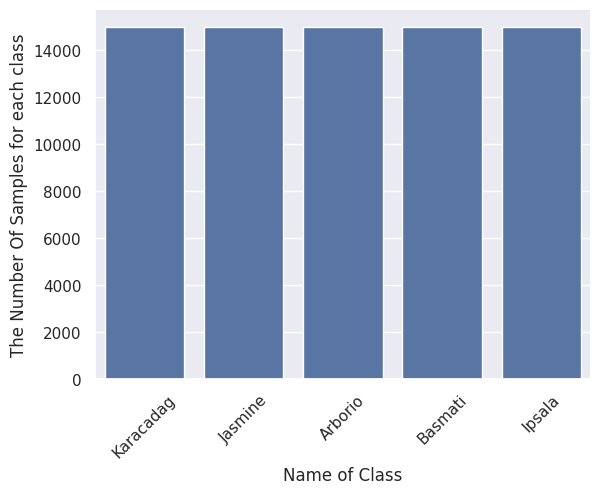

In [10]:
# plot the classes
ax = sns.countplot(x=df.label)

# Set labels and titles
ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

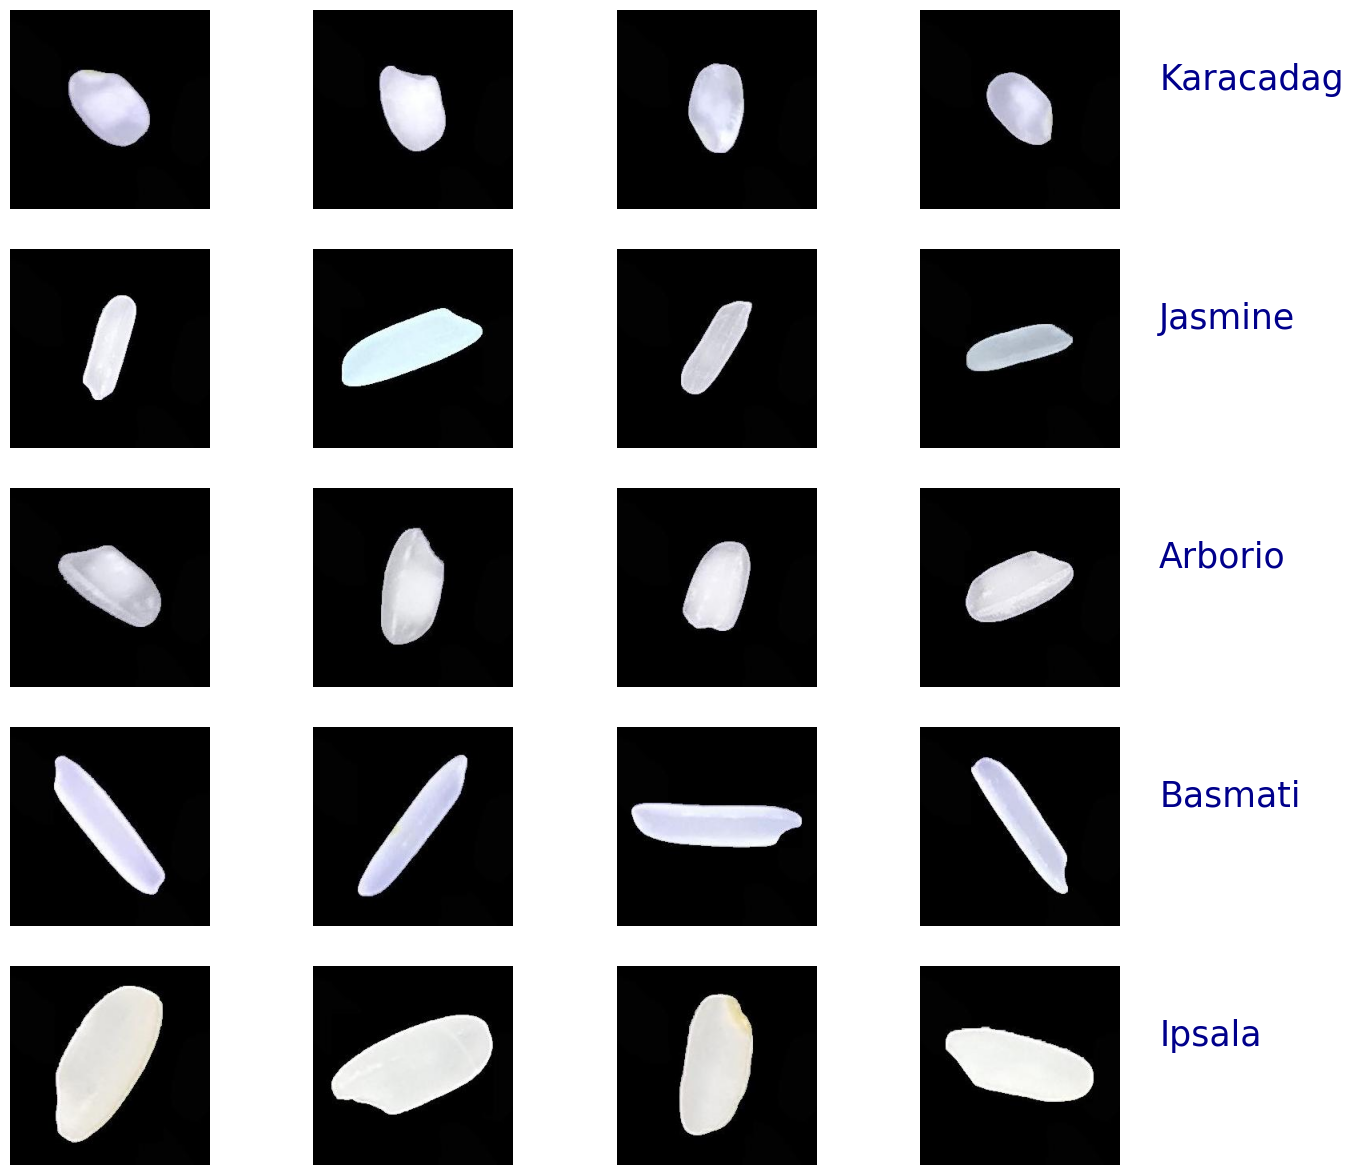

In [11]:
from matplotlib.gridspec import GridSpec
# Create figure and grid of subplots
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(5, 4, figure=fig)

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get the filepaths for the first four images in the category
    filepaths = df[df['label'] == category]['image'].values[:4]

    # Loop through the filepaths and add an image to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')

    # Add a label to the bottom of the subplot grid
    ax.text(300, 100, category, fontsize=25, color='darkblue')

plt.show()

### Splitting Data

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

### Augmentasi Data

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


### Training Model

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Set the input shape for the model
input_shape = (50, 50, 3)

# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [18]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# Train the model on the training data
history = model.fit(train_generator, epochs=5, validation_data=test_generator)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 155s 80ms/step - accuracy: 0.7622 - loss: 0.5776 - val_accuracy: 0.9448 - val_loss: 0.1421
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 146s 78ms/step - accuracy: 0.9479 - loss: 0.1435 - val_accuracy: 0.9741 - val_loss: 0.0749
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 78ms/step - accuracy: 0.9589 - loss: 0.1086 - val_accuracy: 0.9718 - val_loss: 0.0777
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 148s 79ms/step - accuracy: 0.9673 - loss: 0.0919 - val_accuracy: 0.9646 - val_loss: 0.0956
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 185s 70ms/step - accuracy: 0.9761 - loss: 0.0684 - val_accuracy: 0.9811 - val_loss: 0.0550


### Evaluate the Model

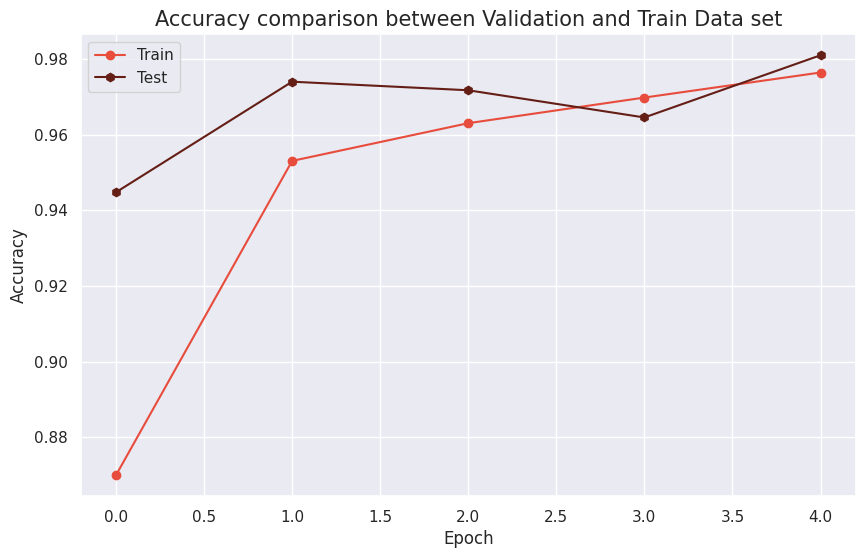

In [23]:
#Accuracy comparison between Validation and Train Data set
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'],color="#E74C3C",marker='o') # Use history.history to access training metrics
plt.plot(history.history['val_accuracy'],color='#641E16',marker='h') # Use history.history to access validation metrics
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

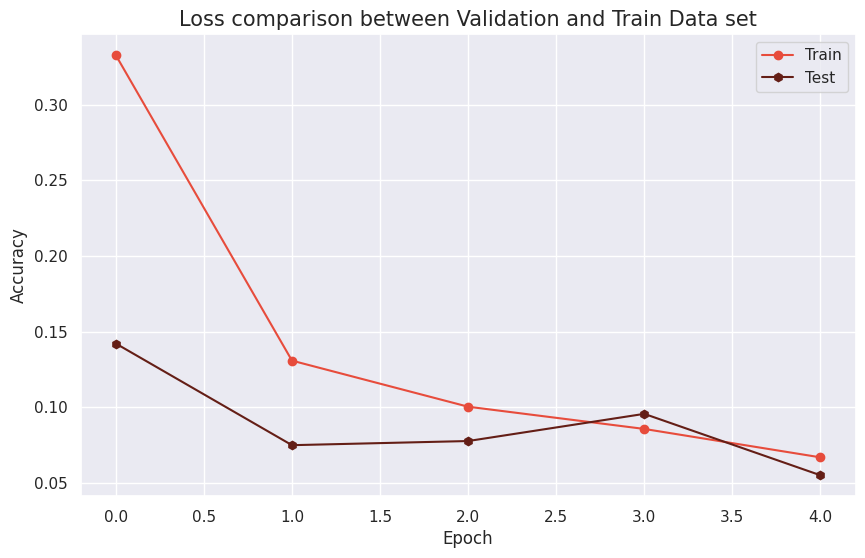

In [25]:
#Loss comparison between Validation and Train Data set
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],color="#E74C3C",marker='o') # Access loss using history.history['loss']
plt.plot(history.history['val_loss'],color='#641E16',marker='h') # Access val_loss using history.history['val_loss']
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [26]:
# Evaluate the model on the test data
metrics = model.evaluate(test_generator)
# Print the accuracy of the model
print('Accuracy:', metrics[1])

469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9815 - loss: 0.0534
Accuracy: 0.9815333485603333


In [27]:
# Save the model
model.save('CNN_model.h5')
print ("Model saved successfully!")

Model saved successfully!
